In [20]:
from collections import Counter

import pandas as pd
import numpy as np
import sklearn as sk
import xgboost
import matplotlib.pyplot as plt

In [21]:
train = pd.read_csv('data/train_ratings_binary.csv', dtype={'userId': np.int32, 'movieId': np.int32, 'rating': np.int32})

In [22]:
print(train.shape)
train.head()

(11946576, 3)


,userId,movieId,rating
0,1,7,0
1,1,50,0
2,1,151,1
3,1,160,0
4,1,173,0


In [23]:
movie_size = set(train['movieId'].values)
user_size = set(train['userId'].values)

In [24]:
movie_size, user_size

({7815,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  65567,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  32840,
  72,
  73,
  74,
  76,
  75,
  78,
  79,
  80,
  81,
  82,
  83,
  77,
  85,
  86,
  87,
  88,
  89,
  90,
  84,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  32898,
  131,
  132,
  32892,
  133,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  32902,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  1

1823
13686


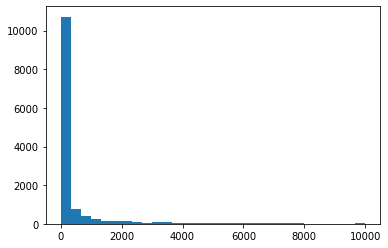

In [25]:
movie_count = Counter(train['movieId'].values)
cnt_list = sorted(movie_count.values())

freq_movie_id = []
for key in movie_count:
    if movie_count[key] > 1000:
        freq_movie_id.append(key)
freq_movie_id = sorted(freq_movie_id)

print(len(freq_movie_id))
print(len(cnt_list))

plt.hist(cnt_list, bins=30, range=[0, 10000])
plt.show()

# 1580 * 130000 * 4 / 1024 / 1024 = 800 MB

In [26]:
movie_id = sorted(list(set(train['movieId'].values)))
print(len(movie_id))
movie_id= [i for i in movie_id if i in freq_movie_id]
movie_id2idx = {}
for idx, id in enumerate(movie_id):
    movie_id2idx[id] = idx
    
user_id = sorted(list(set(train['userId'].values)))
user_id2idx = {}
for idx, id in enumerate(user_id):
    user_id2idx[id] = idx

13686


In [27]:
len(freq_movie_id), len(movie_id)

(1823, 1823)

In [28]:
len(freq_movie_id)

1823

In [36]:
user_fea = [[0] * len(freq_movie_id) for _ in range(len(user_size))]
#user_fea = [[0] * len(freq_movie_id) for _ in range(user_size)]

In [37]:
for i in range(train.shape[0]):
    if i % 500000 == 0:
        print(i)
    user_id = train.iloc[i, 0]
    movie_id = train.iloc[i, 1]
    rating = train.iloc[i, 2]
    if movie_id in freq_movie_id:
        if rating == 0:
            rating = -1
#         print(user_id2idx[user_id], movie_id2idx[movie_id])
        user_fea[user_id2idx[user_id]][movie_id2idx[movie_id]] = rating
    

0
500000
1000000
1500000
2000000
2500000
3000000
3500000
4000000
4500000
5000000
5500000
6000000
6500000
7000000
7500000
8000000
8500000
9000000
9500000
10000000
10500000
11000000
11500000


In [38]:
user_fea_df = pd.DataFrame(user_fea)

In [39]:
user_fea_df.shape

(138493, 1823)

In [40]:
from sklearn.cluster import KMeans

In [41]:
kmeans_fea = user_fea_df.to_numpy()

In [ ]:
%%time
kmeans = KMeans(n_clusters=100, verbose=True, n_jobs=4).fit(kmeans_fea)